<a href="https://colab.research.google.com/github/PaulinaJohn/My-first-Machine-Learning-Project/blob/main/Simple_Linear_Regression_Model_practice_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# let's meet the data. 
# Algorithm: Identify the format in which the dataset is provided, improt the dataset using the appropriate import function 
#and catch a glimpse of the data by viewing the first few rows

# loading in the dataset
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

# Previewing the data; first 5 rows
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# let's rename the columns. 
# Algorithm: first, I'll create a dictionary with keys as the old column names and values as the new column names
#then, I'll feed this dictionary into the `.remane()` method by asssigning it as value to the `columns` arguement.

# creating the dictionary
column_names = {
    "X1": "Relative_Compactness", 
    "X2": "Surface_Area", 
    "X3": "Wall_Area", 
    "X4": "Roof_Area", 
    "X5": "Overall_Height", 
    "X6": "Orientation", 
    "X7": "Glazing_Area", 
    "X8": "Glazing_Area_Distribution", 
    "Y1": "Heating_Load", 
    "Y2": "Cooling_Load"
    }

# feeding the dictionary into the .rename() method
energy_data = df.rename(columns = column_names)

energy_data.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Simple Linear Regression Model

In [5]:
# Now, I want to collect a sample of the dataset for the simple linear regression model. Particularly, Relative_Compactness and Cooling_Load. 

linear_reg_sample = energy_data[["Relative_Compactness", "Cooling_Load"]].sample(n = 15, random_state= 2)

linear_reg_sample

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


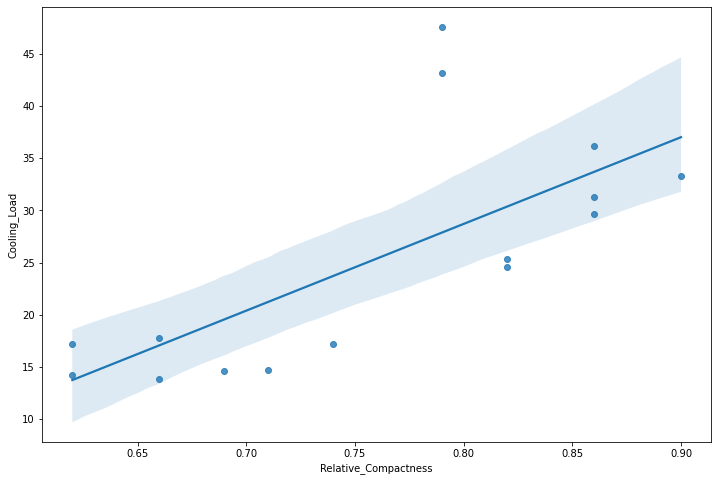

In [6]:
# now, let's create a regression plot to have an idea of the relationship between these two variables

# setting the size of the chart
fig = plt.figure(figsize = (12, 8))

# creating the plot
sns.regplot(data = linear_reg_sample, x = "Relative_Compactness", y = "Cooling_Load")
plt.show()

In [7]:
# Now, let's try a simple linear regression model. 

# The aim is to predict Cooling Load (Dependent or Response variable) using Relative_Compactness(Independent variable or predictor)

# We begin by collecting out the two variables we need out of the entire dataset. 
#I will use all the rows but only these two columns

simple_linear_data = energy_data[["Relative_Compactness", "Cooling_Load"]]
simple_linear_data.head()

,Relative_Compactness,Cooling_Load
0,0.98,21.33
1,0.98,21.33
2,0.98,21.33
3,0.98,21.33
4,0.90,28.28


In [8]:
# Next, let's normalize our dataset- this will make the range of values for all the features(already numeric values) the same. 
# The importance of this is that the model is able to learn more quickly and this improves its validation accuracy.

# normalizing the dataset to a common scale using the MinMaxScaler

normalized_energy_data = pd.DataFrame(MinMaxScaler().fit_transform(simple_linear_data), columns = simple_linear_data.columns)

# Let's create our predictor and response variables.

compactness_predictor = normalized_energy_data["Relative_Compactness"]
cooling_target = normalized_energy_data["Cooling_Load"]

In [9]:
# let'split our dataset into training and testing subsets. 

x_train, x_test, y_train, y_test = train_test_split(compactness_predictor, cooling_target, test_size = 0.3, random_state = 1)
#I am using 70% of the dataset to train the model and 30% to test.

In [10]:
# Let's reshape our independent variables, because sklearn needs a 2D array as input.

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [11]:
# Now, let's build the model using the linear regression algorithm
model = LinearRegression().fit(x_train, y_train)


In [12]:
# training completed. Now let's throw in our test data to test our model and otain predicted values
predict_y = model.predict(x_test)

In [13]:
# Let's check the MAE:  The mean absolute error. 

from sklearn.metrics import mean_absolute_error

mae = round(mean_absolute_error(y_test, predict_y), 3)

mae

0.155

Generally, the lower the MAE, the more accurate the model

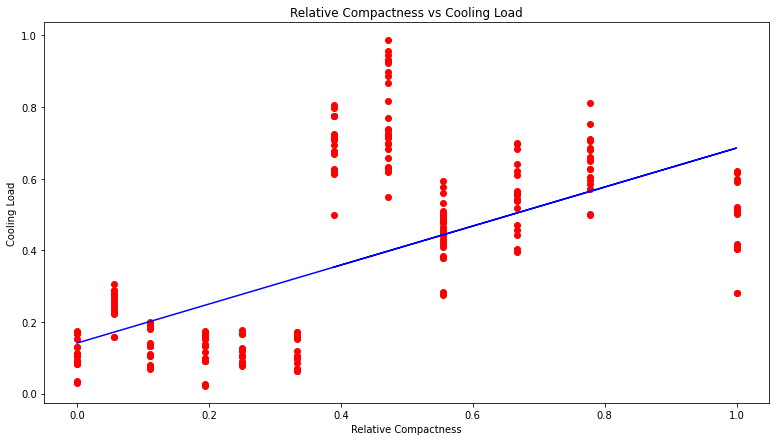

In [15]:
# Lets see a plot of the actual and predicted values

fig = plt.figure(figsize = (13, 7))

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, predict_y, color = 'blue')
plt.title('Relative Compactness vs Cooling Load')
plt.xlabel('Relative Compactness')
plt.ylabel('Cooling Load')
plt.show()